<a href="https://colab.research.google.com/github/100485446-UC3M/Segunda_Practica_Machine_Learning_Grupo16/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicciones Práctica 1
## Esteban Gómez Buitrago 100485446
## Nicolás Alejandro Cuesta García 100495966
## Grupo 16

# Visualización de datos con PCA (Principal Component Analysis)
El primer paso es determinar cuál método de escalado va a ser el mejor para el
problema. Para lograr esto, utilizaremos PCA.

Para emplear PCA primero es necesario importar las librerías pertinentes y declarar una semilla de replicación.

In [7]:
#Las librerías necesarias son importadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.datasets import load_iris


np.random.seed(100495966)

Ahora vamos a realizar el proceso de PCA para transformar los datos a 2D y poder visualizarlos correctamente. Hacer esto nos va a lleavr a reducir la dimensionalidad de nuestro problema y también mediante la visualización nos va a permitir elegir cuál es el mejor scaler para este escenario.


Creando Pipelines
 -> Pipeline 'MinMaxScaler' completada.

    -> Varianza Explicada: [0.78903362 0.1290949 ]
    -> Varianza Acumulada: [0.78903362 0.91812852]

 -> Pipeline 'RobustScaler' completada.

    -> Varianza Explicada: [0.66945748 0.19962637]
    -> Varianza Acumulada: [0.66945748 0.86908385]

 -> Pipeline 'StandardScaler' completada.

    -> Varianza Explicada: [0.71874303 0.17108184]
    -> Varianza Acumulada: [0.71874303 0.88982486]



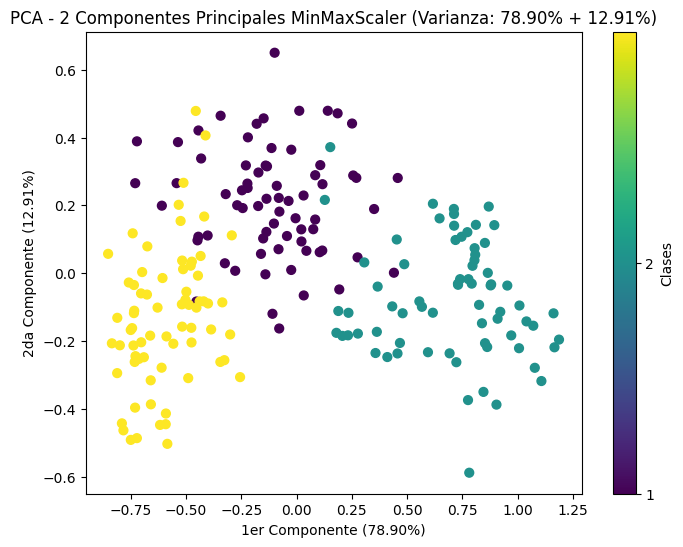

<Figure size 640x480 with 0 Axes>

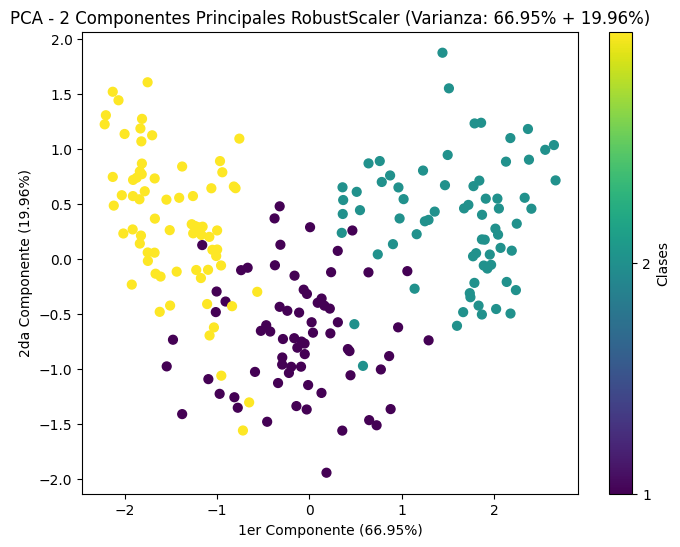

<Figure size 640x480 with 0 Axes>

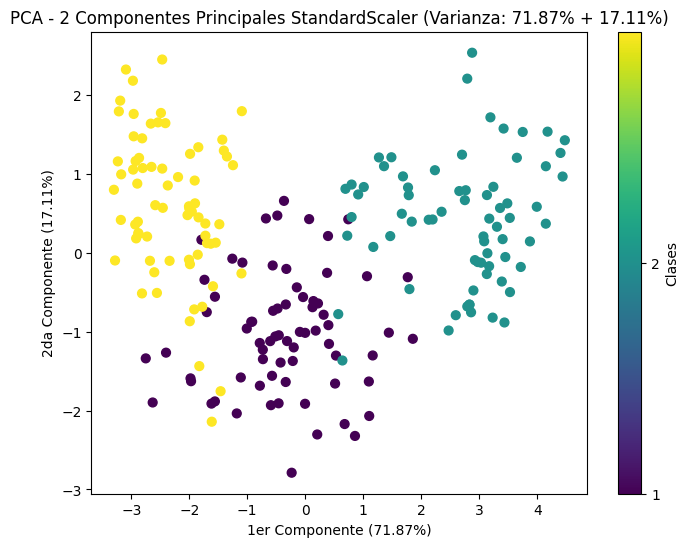

<Figure size 640x480 with 0 Axes>

In [21]:
# Cargar datos
data = pd.read_csv('semillas.csv')
X = data.drop(columns=["clase"])
Y = data["clase"]
#Para chequear que sea el set de datos correcto
#print(data.head())

# Declaramos los Scalers
scalers = {
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler(),
    'StandardScaler': StandardScaler()
}

#Definimos que son dos componentes
pca = PCA(n_components=2)

#Creamos las pipelines
X_Reduced = {} # Diccionario para guardar los datos transformados
explained_variance = {}
cumulative_variance = {}

print("\nCreando Pipelines")
for name, scaler in scalers.items():
    pipeline = Pipeline([
        ('scaler', scaler),
        ('pca', pca)
    ])

    # Ajustar y transformar los datos de características X
    X_Reduced[name] = pipeline.fit_transform(X)
    pca_fitted = pipeline.named_steps['pca']
    # Varianza explicada y acumulada
    explained_variance[name] = pca_fitted.explained_variance_ratio_
    cumulative_variance [name]= np.cumsum(explained_variance[name])
    print(f" -> Pipeline '{name}' completada.\n")
    print(f"    -> Varianza Explicada: {explained_variance[name]}")
    print(f"    -> Varianza Acumulada: {cumulative_variance[name]}\n")

plot_index = 0
for name, data_transformed in X_Reduced.items():
    # Visualizar
    plt.figure(figsize=(8, 6))
    plt.scatter(data_transformed[:, 0], data_transformed[:, 1], c=Y, s=40, cmap='viridis')
    plt.title('PCA - 2 Componentes Principales {} (Varianza: {:.2%} + {:.2%})'.format(name, explained_variance[name][0], explained_variance[name][1]))
    plt.xlabel('1er Componente ({:.2%})'.format(explained_variance[name][0]))
    plt.ylabel('2da Componente ({:.2%})'.format(explained_variance[name][1]))
    plt.colorbar(ticks=range(3), label='Clases')
    plt.show()

    plt.tight_layout()
    plt.show()


En base a los gráficos obtenidos se puede relaizar un análisis visual para determinar la mejor forma de escalado. Pese a que la separación de los grupos
(clusters) en los tre gráficos es similar, en nuestra opinión los clusters más compactos se encuentran en el gráfico de MinMaxScaler. Para confirmar que este es el mejor escalado analizamos los valores de varianza explicada. En estos valores el mayor resultado en la varianza, por más de 7%, fue dado por esta misma forma de escalado. En conclusión, se determinó que los mejores resultados fueron dados por el MinMax Scaler.

# Clustering
Ahora se van a aplicar tres formas de clustering y se analizarán los resultados obtenidos: K-Means, Hierarchical Clustering/Dendrogramas y DBSCAN.

Se va a comenzar con el método de K-Means.